# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1682815691712.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,04/28/2023,4169.48,--,4129.63,4170.06,4127.18
1,04/27/2023,4135.35,--,4075.29,4138.24,4075.29
2,04/26/2023,4055.99,--,4087.78,4089.67,4049.35
3,04/25/2023,4071.63,--,4126.43,4126.43,4071.38
4,04/24/2023,4137.04,--,4132.07,4142.41,4117.77
...,...,...,...,...,...,...
2537,05/03/2013,1614.42,--,1597.60,1618.46,1597.60
2538,05/02/2013,1597.59,--,1582.77,1598.60,1582.77
2539,05/01/2013,1582.70,--,1597.55,1597.55,1581.28
2540,04/30/2013,1597.57,--,1593.58,1597.57,1586.50


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2542.000000,2542.000000,2542.000000,2542.000000
mean,2814.599036,2796.634811,2811.894729,2780.155087
std,872.918125,908.866843,915.625209,901.605589
min,1573.090000,0.000000,0.000000,0.000000
25%,2072.890000,2071.017500,2079.632500,2059.265000
50%,2662.845000,2659.760000,2678.490000,2647.240000
75%,3462.807500,3458.182500,3485.272500,3439.250000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2519.000000,2519.000000,2519.000000,2519.000000
mean,2822.636538,2822.169786,2837.569035,2805.539591
std,872.689810,872.634814,879.287118,865.489615
min,1573.090000,1577.520000,1588.770000,1560.330000
25%,2076.925000,2076.630000,2083.895000,2065.075000
50%,2670.710000,2670.260000,2685.440000,2652.010000
75%,3486.610000,3494.175000,3515.265000,3480.500000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2519 non-null   object 
 1   Close/Last  2519 non-null   float64
 2   Volume      2519 non-null   object 
 3   Open        2519 non-null   float64
 4   High        2519 non-null   float64
 5   Low         2519 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.8+ KB


In [5]:
df.shape

(2519, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

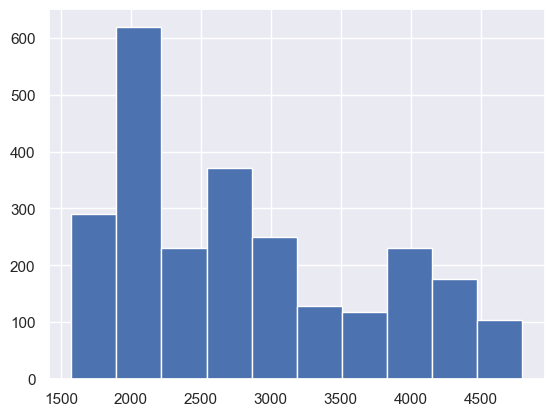

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4169.48

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2822.6365383088614

In [10]:
close_sd = df['Close/Last'].std()
close_sd

872.6898099478998

In [11]:
sigma1 = close_mean + close_sd
sigma1

3695.3263482567613

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4568.016158204661

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5004.3610631786105

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2519 non-null   datetime64[ns]
 1   Close/Last  2519 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-04-29 to 2023-04-28')

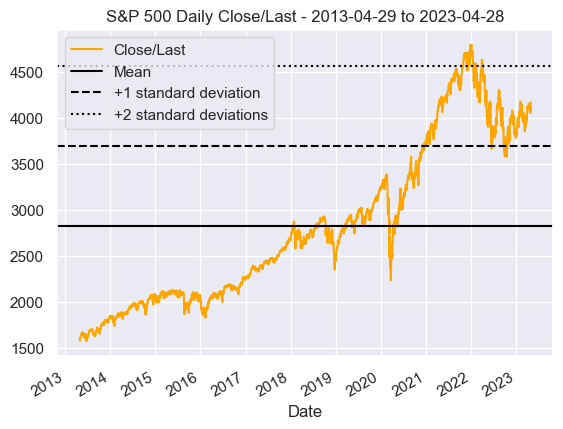

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-04-29 to 2023-04-28')

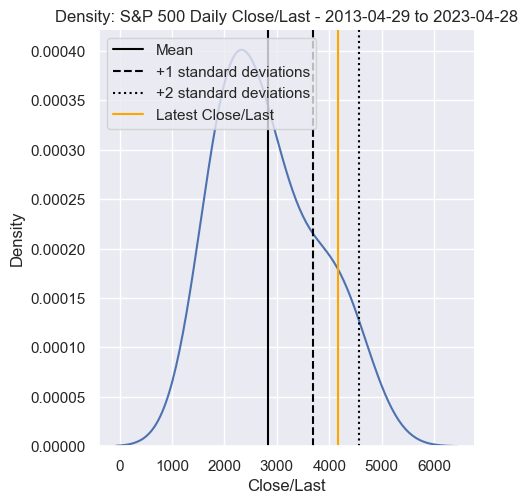

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.5433243820866267

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results